d:\Gender-and-Age-Prediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[3309  699 3994 1497]
[1497  698 2070 1520]
[2315 1448 2848 2130]
[1385 1856 1884 2487]
[3398 3116 3532 3271]
[3776 2299 3872 2456]


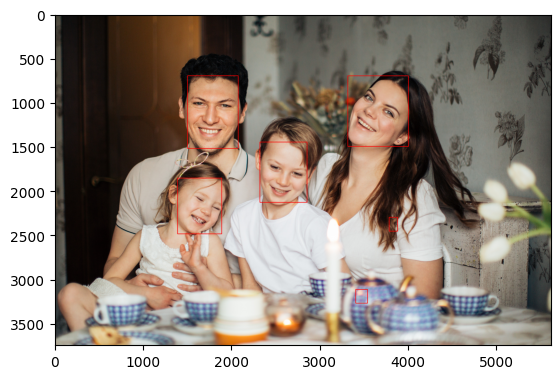

In [1]:
from Facenet.models.mtcnn import MTCNN
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = cv.imread("images/family.jpg")
# image = cv.imread("images/argentina.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

model = MTCNN()
boxes, _ = model.detect(image)

frame_draw = image.copy()
for box in boxes:
    box = np.clip(box, 0, np.inf).astype(np.uint32)
    print(box)
    x1,y1,x2,y2 = box
    cv.rectangle(frame_draw, (x1,y1), (x2,y2), color = (255, 0, 0), thickness = 6)
    
plt.imshow(frame_draw)


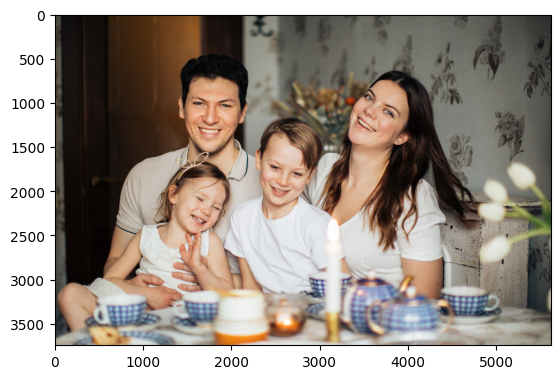

In [4]:
image = Image.open("images/family.jpg")

ndarray_image = np.array(image)
plt.imshow(ndarray_image)

Weights loaded successfully from path: weights/AgeGenderWeights_200epochs.pt


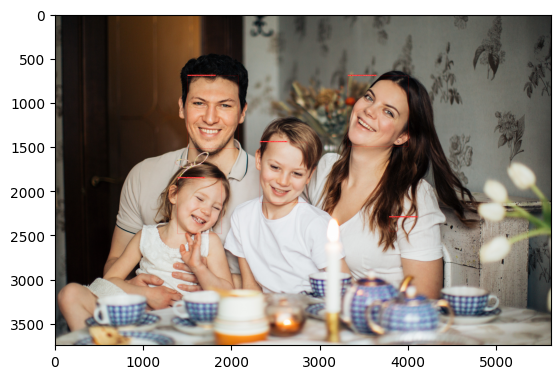

In [9]:
from predict import Model 
import torch
from GenderAge.model import GenderAgePrediction
# weights = torch.load( "weights/AgeGenderWeights_200epochs.pt", map_location = torch.device("cpu"))
model = Model(weights = "weights/AgeGenderWeights_200epochs.pt")
# model = GenderAgePrediction()
# model.load_state_dict(state_dict = torch.load("weights/AgeGenderWeights_200epochs.pt", map_location = torch.device("cpu")))
predicted_image = model.predict("Images/family.jpg")
plt.imshow(predicted_image)

In [7]:
plt.imsave("predicted_image.jpg", predicted_image)

['d:\\Gender-and-Age-Prediction\\weights\\AgeGenderWeights_100epochs.pt',
 'd:\\Gender-and-Age-Prediction\\weights\\AgeGenderWeights_200epochs.pt']